# COVID-19 world

https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

https://github.com/CSSEGISandData/COVID-19

In [1]:
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages')
sys.path

['/Users/andreazen/Dropbox/GitHub/COVID-19_plots',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/andreazen/Library/Python/3.7/lib/python/site-packages',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/Users/andreazen/.ipython']

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

In [3]:
dati = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
#csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

In [4]:
dati.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
399,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
400,NaN,Jamaica,18.1096,-77.2975,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
401,NaN,Reunion,-21.1151,55.5364,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
402,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
403,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [5]:
dati.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20'],
      dtype='object')

In [6]:
#dati.describe()
dati.index

RangeIndex(start=0, stop=404, step=1)

In [7]:
a = dati[ dati['Country/Region'] == 'US' ]
len( list( a['Province/State'] ) )
#print(a)
#type(a
a.sum()

Province/State    King County, WACook County, ILLos Angeles, CAS...
Country/Region    USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Lat                                                         7483.19
Long                                                       -18066.8
1/22/20                                                           1
1/23/20                                                           1
1/24/20                                                           2
1/25/20                                                           2
1/26/20                                                           5
1/27/20                                                           5
1/28/20                                                           5
1/29/20                                                           5
1/30/20                                                           5
1/31/20                                                           7
2/1/20                                          

In [8]:
b = dati[ dati['Province/State'] == 'Hubei' ].T['1/22/20':].index
dati.T['1/22/20':].index
y = dati[ dati['Province/State'] == 'Hubei' ].T['1/22/20':].T.stack().to_numpy()
xticks = dati.T['1/22/20':].index
x = np.arange( len(xticks) )
x, y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([444, 444, 549, 761, 1058, 1423, 3554, 3554, 4903, 5806, 7153,
        11177, 13522, 16678, 19665, 22112, 24953, 27100, 29631, 31728,
        33366, 33366, 48206, 54406, 56249, 58182, 59989, 61682, 62031,
        62442, 62662, 64084, 64084, 64287, 64786, 65187, 65596, 65914,
        66337, 66907, 67103, 67217, 67332, 67466, 67592, 67666, 67707,
        67743, 67760, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 67773.0], dtype=object))

In [14]:
datetime.strptime("1/22/20", '%m/%d/%y').strftime('%m %d')
#datetime.strptime(, '%m/%d/%y').strftime('%m %d')
xticks
for date in list(xticks):
    print(datetime.strptime(date, '%m/%d/%y').strftime('%b %d'))

Jan 22
Jan 23
Jan 24
Jan 25
Jan 26
Jan 27
Jan 28
Jan 29
Jan 30
Jan 31
Feb 01
Feb 02
Feb 03
Feb 04
Feb 05
Feb 06
Feb 07
Feb 08
Feb 09
Feb 10
Feb 11
Feb 12
Feb 13
Feb 14
Feb 15
Feb 16
Feb 17
Feb 18
Feb 19
Feb 20
Feb 21
Feb 22
Feb 23
Feb 24
Feb 25
Feb 26
Feb 27
Feb 28
Feb 29
Mar 01
Mar 02
Mar 03
Mar 04
Mar 05
Mar 06
Mar 07
Mar 08
Mar 09
Mar 10
Mar 11
Mar 12
Mar 13
Mar 14


Italy 41035
France 10947
Germany 15320
Spain 17963
United Kingdom 2716
Belgium 1795
China 81156
Japan 924
Korea, South 8565
Iran 18407
US 13677
Singapore 345


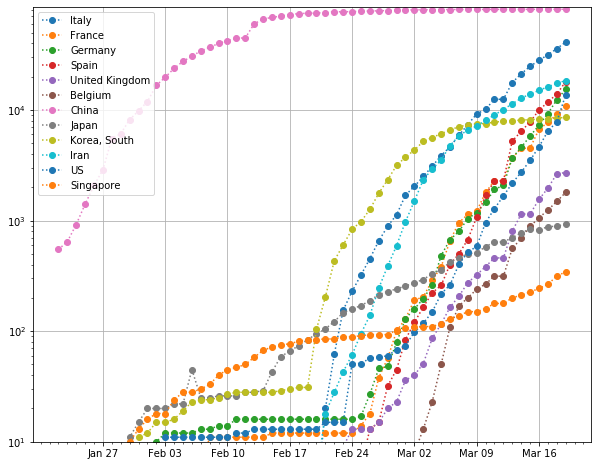

In [4]:
%matplotlib inline 
##%matplotlib 

plt.rcParams['figure.figsize'] = [10, 8]
plt.close('all')
fig, ax = plt.subplots()

xticks = dati.T['1/22/20':].index
fxticks = [ datetime.strptime(date, '%m/%d/%y').strftime('%b %d') for date in list(xticks) ]
x = np.arange( len(xticks) )

#y = dati[ dati['Province/State'] == 'Hubei' ].T['1/22/20':].T.stack().to_numpy()
#plt.plot(x, y, marker='o',label='Hubei')

#lista = ['Italy', 'France', 'Germany']
#for name in lista:
#    print('Fetching ',name)
#    y = dati[ dati['Country/Region'] == name ].T['1/22/20':].T.stack().to_numpy()
#    plt.plot(x, y, marker='o',label=name )
    
lista = ['Italy', 'France', 'Germany', 'Spain', 'United Kingdom']
lista.append('Belgium') 
lista.append('China') 
lista.append('Japan') 
lista.append('Korea, South') 
lista.append('Iran') 
lista.append('US') 
lista.append('Singapore') 
for name in lista:
#    print(name)
    y = dati[ dati['Country/Region'] == name ].sum()['1/22/20':].to_numpy()
#    print(y)
    print(name,y[-1])
    plt.plot(x, y, 
             marker = 'o',
             linestyle = ':',
             label = name )

lista = []
#lista = ['Hubei', 'Beijing']
for name in lista:
    print(name)
    y = dati[ dati['Province/State'] == name ].T['1/22/20':].T.stack().to_numpy()
    plt.plot(x, y, 
             marker = '.', 
             linestyle ='', 
             label = name)
    
start = 5; step = 7
plt.xticks(x[start::step], fxticks[start::step])
ax.xaxis.set_minor_locator(MultipleLocator())

#plt.axhline(y=50000,color='b', linestyle='-.')

plt.legend(loc='best')
plt.ylim(bottom=10)
plt.yscale('log')
plt.grid()
#plt.grid(which='both')